In [126]:
# Standard Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time;

In [237]:
class Lab():
    def __init__(self):
        self._experiments = {}
        self._description = "List of changes performed during lab time: \n"
        self._analysis_done = {}
        self._fit_done = {}
    
    def __str__(self):
        return self._description
    
    def log(self):
        print(self._description)

    def add_experiment(self, data, name=None):
        if name == None:
            length = len(self._experiments)
            self._experiments[str(length)] = data
            self._analysis_done[str(length)] = False
            self._description += "  -  Nr. {} experiment was added. ({})\n".format(length, time.asctime(time.localtime(time.time())))
        else:
            self._experiments[name] = data
            self._analysis_done[name] = False
            length = len(self._experiments)
            self._description += "  -  Nr. {} experiment was added and called \"{}\". ({})\n".format(length, name, time.asctime(time.localtime(time.time())))
        
    def analysis(self, name, type="standard", save=False):
        try:
            data = self._experiments[name]
            print("Pairplot of data from experiment named \"{}\":".format(name))
            print("----------------------------------------------------------")
            sns.pairplot(data, diag_kind='kde')
            plt.show()
            
            if save:
                plt.savefig("Pairplot_{}.png".format(name.replace(" ", "_")))
            
            print("\n\nCorrelation matrix plot of data from experiment named \"{}\":".format(name))
            print("-------------------------------------------------------------------------")
            print(data.corr())
            self._analysis_done[name] = True
        except:
            print("Something went wrong!")
        finally:
            if self._analysis_done[name]:
                self._description += "  -  Analysis was performed on experiment called \"{}\". ({})\n".format(name, time.asctime(time.localtime(time.time())))
            else:
                self._description += "  -  Tried to make an analysis, but something went wrong!"

In [238]:
lab = Lab()

In [239]:
data = sns.load_dataset('iris')
lab.add_experiment(data, name="First experiment")

Pairplot of data from experiment named "First experiment":
----------------------------------------------------------


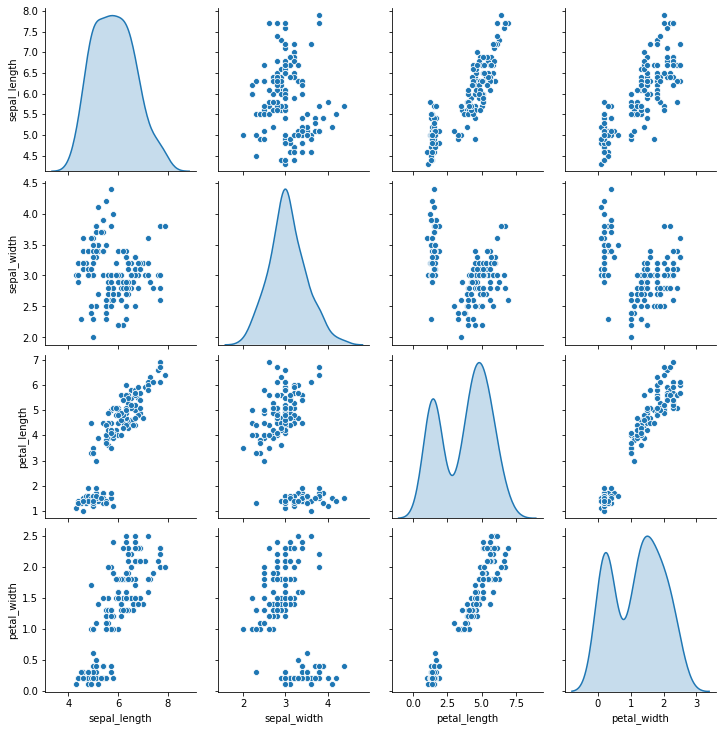



Correlation matrix plot of data from experiment named "First experiment":
-------------------------------------------------------------------------
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<Figure size 432x288 with 0 Axes>

In [240]:
lab.analysis(name="First experiment", save=True)

In [241]:
print(lab)

List of changes performed during lab time: 
  -  Nr. 1 experiment was added and called "First experiment". (Fri Dec 17 21:35:26 2021)
  -  Analysis was performed on experiment called "First experiment". (Fri Dec 17 21:35:33 2021)

